In [50]:

## decay vs mod rate 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from statannot import add_stat_annotation 

In [53]:
## 1. Supp_Fig8e--- ----

In [2]:
out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
decay=pd.read_csv(out+'final_30C_37C_classify_fast_vs_slower_allinfo',sep='\t')
decay[['transcript','gene']] = decay['Name'].str.split('::',1,expand = True)

/tmp/ipykernel_20362/4251295922.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  decay[['transcript','gene']] = decay['Name'].str.split('::',1,expand = True)


/tmp/ipykernel_20362/1366586277.py:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  aver[['gene','window_start','window_end']] = aver['idd'].str.split('_',2,expand = True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>=60(mins)    3135
<60(mins)     2575
Name: halflife_30C, dtype: int64
>=60(mins)    3135
<60(mins)     2575
Name: halflife_30C, dtype: int64
5710
<60(mins) v.s. >=60(mins): Mann-Whitney-Wilcoxon test greater, P_val=2.477e-12 U_stat=3.090e+06


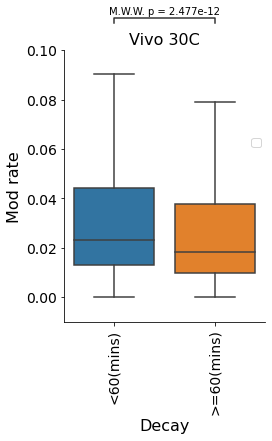

In [3]:
dir1 = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
mod1 = pd.read_csv(dir1+'mod_rate_all_30C.txt', header=None,sep='\t')
mod1.columns = ['position', 'mut', 'coverage','mutrate','temp','region','id','idd','rep']
mod1['id_pos'] = mod1['id'] + ':' + mod1['position'].astype(str)

aver = mod1.groupby([ 'idd', 'region','position'])['mutrate'].mean()
aver = aver.reset_index()
aver[['gene','window_start','window_end']] = aver['idd'].str.split('_',2,expand = True)
mod1=aver
mod1['Name'] = mod1['gene'] 

### merge decay and gini index  

merge = pd.merge(decay,mod1,how='left',on=['Name','Name'])
merge['halflife_30C'] = merge['halflife_x']
dplot = merge
dplot['halflife_30C'] = np.where((dplot['halflife_30C'] == '20.0') | (dplot['halflife_30C'] == '40.0'), '<60(mins)', dplot['halflife_30C'])
dplot['halflife_30C'] = np.where((dplot['halflife_30C'] == '60.0') | (dplot['halflife_30C'] == '120.0') | (dplot['halflife_30C'] == '>120'), '>=60(mins)', dplot['halflife_30C'])
print(dplot.halflife_30C.value_counts())


### plot mutation rate 

print(dplot.halflife_30C.value_counts())
flt = dplot[dplot['halflife_30C'].notnull()]
print(flt.shape[0]) 

plt.figure(figsize=(3.6,5))

order = ['<60(mins)','>=60(mins)']
ax = sns.boxplot(data=dplot, x='halflife_30C',y='mutrate',order = order, showfliers = False, dodge=False)  
plt.title('Vivo 30C',fontsize = 16)
plt.xlabel('Decay',fontsize = 16) 
plt.ylabel('Mod rate',fontsize = 16)
plt.xticks(fontsize = 14,rotation=90) 
plt.yticks(fontsize = 14) 
plt.ylim(-0.01,0.1)
plt.legend(loc='best', bbox_to_anchor=(1.01, 0.7),prop={'size': 12})
ax.spines[['right', 'top']].set_visible(False) 

add_stat_annotation(ax, data=dplot, x='halflife_30C',y='mutrate',
                    box_pairs = [('<60(mins)','>=60(mins)')],
                    comparisons_correction = None,
                    test="Mann-Whitney-gt",text_format='full', loc='outside', line_offset_to_box=0.1, verbose=3)  

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'supp_Fig8e_vivo_30C_mod_rate.pdf',bbox_inches='tight', dpi=300)

/tmp/ipykernel_20362/978604284.py:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  aver[['gene','window_start','window_end']] = aver['idd'].str.split('_',2,expand = True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<60(mins)     27144
>=60(mins)     3664
Name: halflife_37C, dtype: int64
<60(mins)     27144
>=60(mins)     3664
Name: halflife_37C, dtype: int64
30808
<60(mins) v.s. >=60(mins): Mann-Whitney-Wilcoxon test greater, P_val=4.442e-39 U_stat=3.805e+07


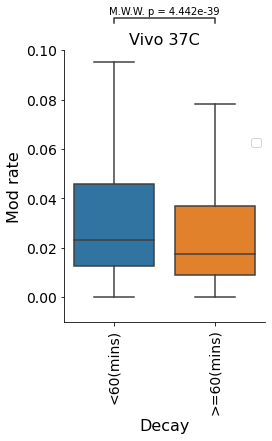

In [4]:
dir1 = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
mod1 = pd.read_csv(dir1+'mod_rate_all_37C.txt', header=None,sep='\t')
mod1.columns = ['position', 'mut', 'coverage','mutrate','temp','region','id','idd','rep']
mod1['id_pos'] = mod1['id'] + ':' + mod1['position'].astype(str)

aver = mod1.groupby([ 'idd', 'region','position'])['mutrate'].mean()
aver = aver.reset_index()
aver[['gene','window_start','window_end']] = aver['idd'].str.split('_',2,expand = True)
mod1=aver
mod1['Name'] = mod1['gene'] 

### merge decay and gini index  

merge = pd.merge(decay,mod1,how='left',on=['Name','Name'])
merge['halflife_37C'] = merge['halflife_y']
dplot = merge
dplot['halflife_37C'] = np.where((dplot['halflife_37C'] == '20.0') | (dplot['halflife_37C'] == '40.0'), '<60(mins)', dplot['halflife_37C'])
dplot['halflife_37C'] = np.where((dplot['halflife_37C'] == '60.0') | (dplot['halflife_37C'] == '120.0') | (dplot['halflife_37C'] == '>120'), '>=60(mins)', dplot['halflife_37C'])
print(dplot.halflife_37C.value_counts())


### plot mutation rate 

print(dplot.halflife_37C.value_counts())
flt = dplot[dplot['halflife_37C'].notnull()]
print(flt.shape[0]) 

plt.figure(figsize=(3.6,5))

order = ['<60(mins)','>=60(mins)']
ax = sns.boxplot(data=dplot, x='halflife_37C',y='mutrate',order = order, showfliers = False, dodge=False)  # order = order
plt.title('Vivo 37C',fontsize = 16)
plt.xlabel('Decay',fontsize = 16) 
plt.ylabel('Mod rate',fontsize = 16)
plt.xticks(fontsize = 14,rotation=90) 
plt.yticks(fontsize = 14) 
plt.ylim(-0.01,0.1)
plt.legend(loc='best', bbox_to_anchor=(1.01, 0.7),prop={'size': 12})
ax.spines[['right', 'top']].set_visible(False) 

add_stat_annotation(ax, data=dplot, x='halflife_37C',y='mutrate',
                    box_pairs = [('<60(mins)','>=60(mins)')],
                    comparisons_correction = None,
                    test="Mann-Whitney-gt",text_format='full', loc='outside', line_offset_to_box=0.1, verbose=3)  

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'supp_Fig8e_vivo_37C_mod_rate.pdf',bbox_inches='tight', dpi=300)